# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
#df=pd.read_csv("glass.csv")
ColumnNames=['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names=ColumnNames)
df.drop(["Id"], axis=1, inplace=True)
df.to_csv('glass_lr.csv')
df.head(214)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# LR using matrix

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1]

one = np.ones((len(x),1))
a2 = np.append(one, x, axis=1)
#reshape Y to a column vector
b2 = np.array(y).reshape((len(y),1))

p_mat = np.array(np.linalg.inv(a2.T.dot(a2)).dot(a2.T).dot(b2))  # Beta calculation
print('Intercept: \n', p_mat[0])
print('\nSlope:')
i = 1
while i < len(p_mat):
 print(p_mat[i])
 i += 1

i = 1
pred = []
for key in x.T:
 tmp = key * p_mat[i]
 pred.append(tmp.T)
 i += 1
 
pred_final =  p_mat[0] + np.sum(pred, axis = 0)
print('\nPredicted Values:')
print(pred_final)
print('\n', np.shape(pred_final))

Intercept: 
 [-204.20713346]

Slope:
[87.0012457]
[1.10470472]
[-0.32298427]
[1.59225253]
[0.77683073]
[0.41084106]
[0.21215116]
[0.81989218]
[-0.75293837]

Predicted Values:
[1.13396477 2.53114175 2.46618367 1.6702613  1.9837305  1.69049655
 1.90628474 1.7326234  2.48345998 1.81978909 1.75462749 1.58775572
 1.76384683 1.63781519 1.66072753 1.7065193  1.40657644 1.67990751
 1.92255749 2.19360769 1.60619268 1.44126517 1.4416257  1.76716106
 1.85872443 1.73710475 2.02872212 1.76150847 1.71914289 1.85479796
 1.48712091 1.64612919 1.5290572  1.80938616 1.61522788 1.70677371
 2.20819509 1.73962147 1.26110592 1.26110592 1.49217065 1.60789226
 2.0453942  1.17278892 1.25549855 1.90407494 1.76037912 1.61935737
 0.96535895 1.95100402 0.86861096 1.82924145 2.39775539 2.27186799
 2.32966098 1.98995917 0.85036118 1.73394853 2.01397568 1.77674614
 1.9192362  2.38488841 1.06769606 1.37992275 1.3004869  1.80004389
 0.93222994 1.00991301 1.08199762 1.25708108 3.03285285 1.38965276
 2.12469329 2.3294098

##  Calculating Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:

<div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>


In [4]:
SSE = sum((y - pred_final.T) ** 2)
SST = sum((y - np.mean(y)) ** 2)
RSquared = (1 - (SSE / SST)) * 100 
print('R^2: %.2f' %RSquared + '%')

R^2: 74.65%


# Actual vs Predicted

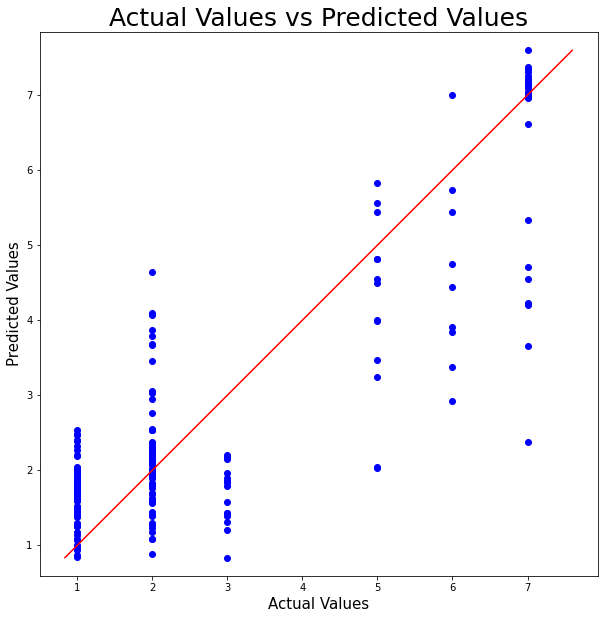

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y, pred_final, c='blue')

p1 = max(max(pred_final), max(y))
p2 = min(min(pred_final), min(y))
plt.title('Actual Values vs Predicted Values', fontsize=25)
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()